Implémentation d'un réseau de neurones convolutif (CNN)

In [9]:
# TP: Implémentation d'un réseau de neurones convolutif (CNN)
# Exercice 1: Keras Implementation

# Step 1: Load Data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Forme des données d'entraînement: {X_train.shape}")
print(f"Forme des étiquettes d'entraînement: {y_train.shape}")
print(f"Forme des données de test: {X_test.shape}")
print(f"Forme des étiquettes de test: {y_test.shape}")

# Distribution des classes dans l'ensemble d'entraînement
train_labels_df = pd.DataFrame({'label': y_train})
class_distribution = train_labels_df['label'].value_counts().sort_index()
print("\nDistribution des classes:")
print(class_distribution)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 110s 10us/step
Forme des données d'entraînement: (60000, 28, 28)
Forme des étiquettes d'entraînement: (60000,)
Forme des données de test: (10000, 28, 28)
Forme des étiquettes de test: (10000,)

Distribution des classes:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


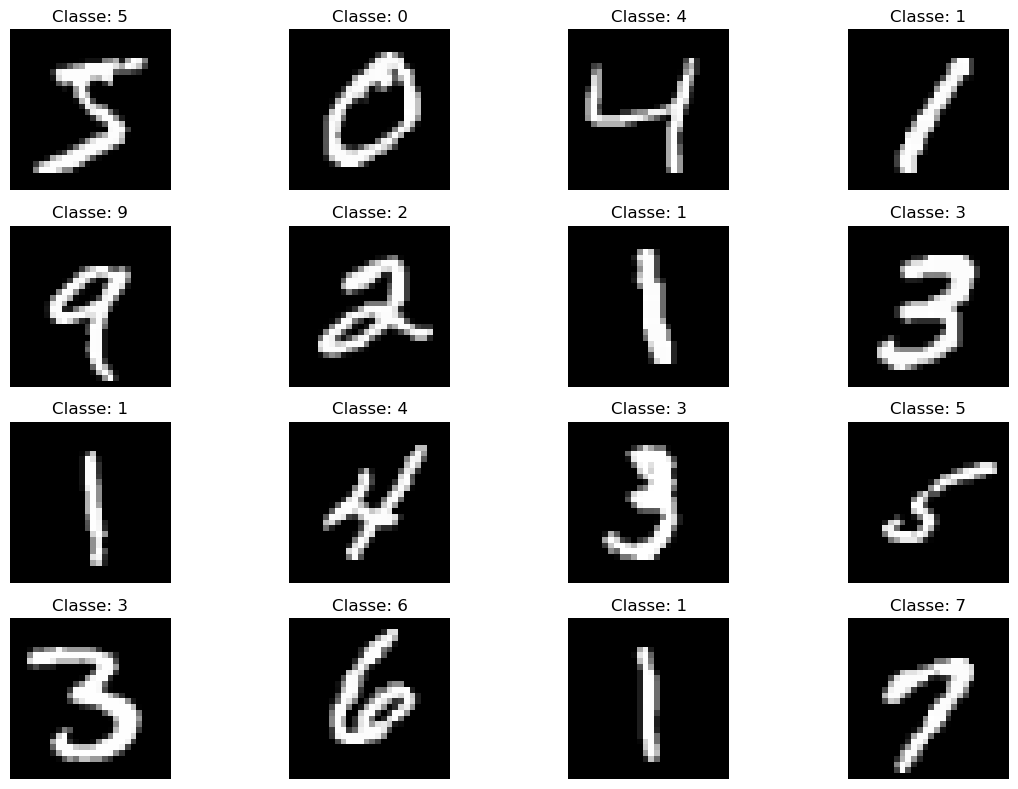

In [11]:
# Visualisation d'un échantillon d'images
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Classe: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Prétraitement des données
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Conversion des étiquettes en format catégoriel
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [19]:
# Création du modèle CNN
model = Sequential([
    # conv1: 32 convolutions 5×5, suivie de ReLU
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    
    # pool1: max-pooling 2×2
    MaxPooling2D((2, 2)),
    
    # conv2: 64 convolutions 5×5, suivie de ReLU
    Conv2D(64, (5, 5), activation='relu'),
    
    # pool2: max-pooling 2×2
    MaxPooling2D((2, 2)),
    
    # conv3: 64 convolutions 5×5, suivie de ReLU
    Conv2D(64, (5, 5), activation='relu'),
    
    # Aplatir pour les couches fully-connected
    Flatten(),
    
    # fc4: fully-connected, 100 neurones en sortie, suivie de ReLU
    Dense(100, activation='relu'),
    Dropout(0.5),
    
    # fc5: fully-connected, 10 neurones en sortie, suivie de softmax
    Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Affichage de l'architecture du modèle
model.summary()


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 0, 0, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,670 (608.09 KB)

 Trainable params: 155,670 (608.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 119ms/step - accuracy: 0.7952 - loss: 0.6302 - val_accuracy: 0.9843 - val_loss: 0.0493
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.9769 - loss: 0.0831 - val_accuracy: 0.9892 - val_loss: 0.0309
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 108ms/step - accuracy: 0.9848 - loss: 0.0558 - val_accuracy: 0.9914 - val_loss: 0.0250
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9880 - loss: 0.0407 - val_accuracy: 0.9906 - val_loss: 0.0303
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.9905 - loss: 0.0331 - val_accuracy: 0.9914 - val_loss: 0.0263
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.9930 - loss: 0.0246 - val_accuracy: 0.9923 - val_loss: 0.0218
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9907 - val_loss: 0.0291
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.9940 - loss: 0

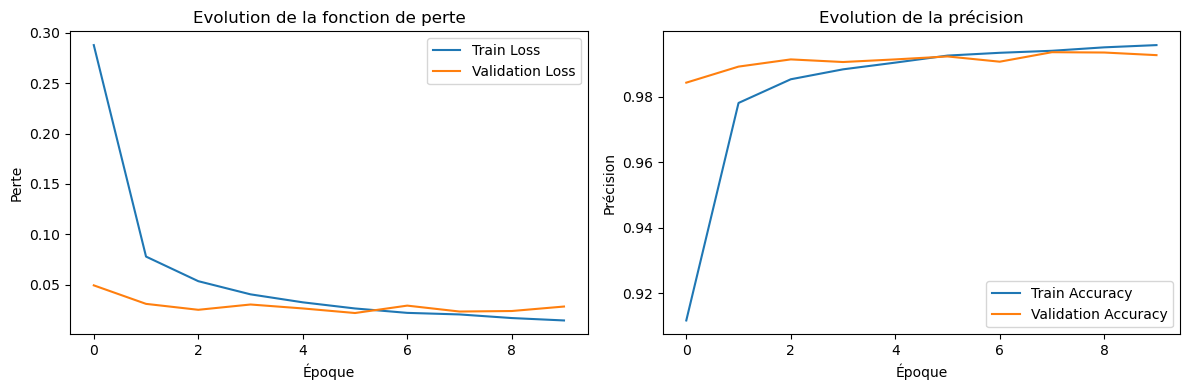

In [25]:
# Step 3: Train
history = model.fit(X_train, y_train_cat,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_test, y_test_cat),
                    verbose=1)

# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolution de la fonction de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolution de la précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.tight_layout()
plt.show()



Précision sur l'ensemble de test: 0.9927
Perte sur l'ensemble de test: 0.0282
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


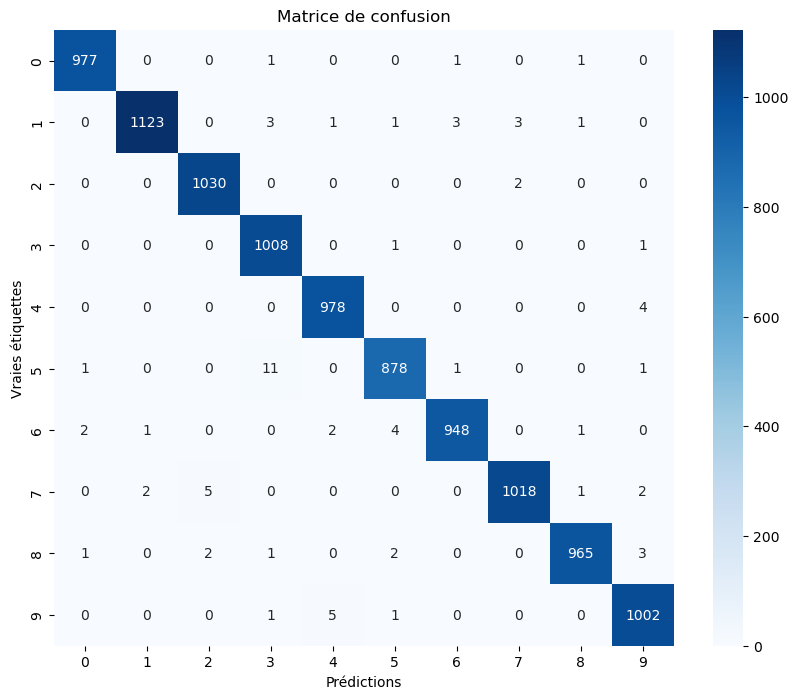


Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [27]:
# Step 4: Test
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nPrécision sur l'ensemble de test: {test_accuracy:.4f}")
print(f"Perte sur l'ensemble de test: {test_loss:.4f}")

# Prédictions et matrice de confusion
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_classes))


100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [01:29<00:00, 111kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 112kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:18<00:00, 90.4kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.14MB/s]


Epoch 1/10, Loss: 0.3126, Test accuracy: 0.9839
Epoch 2/10, Loss: 0.0833, Test accuracy: 0.9898
Epoch 3/10, Loss: 0.0573, Test accuracy: 0.9902
Epoch 4/10, Loss: 0.0421, Test accuracy: 0.9932
Epoch 5/10, Loss: 0.0341, Test accuracy: 0.9929
Epoch 6/10, Loss: 0.0288, Test accuracy: 0.9930
Epoch 7/10, Loss: 0.0240, Test accuracy: 0.9929
Epoch 8/10, Loss: 0.0217, Test accuracy: 0.9913
Epoch 9/10, Loss: 0.0195, Test accuracy: 0.9933
Epoch 10/10, Loss: 0.0178, Test accuracy: 0.9934


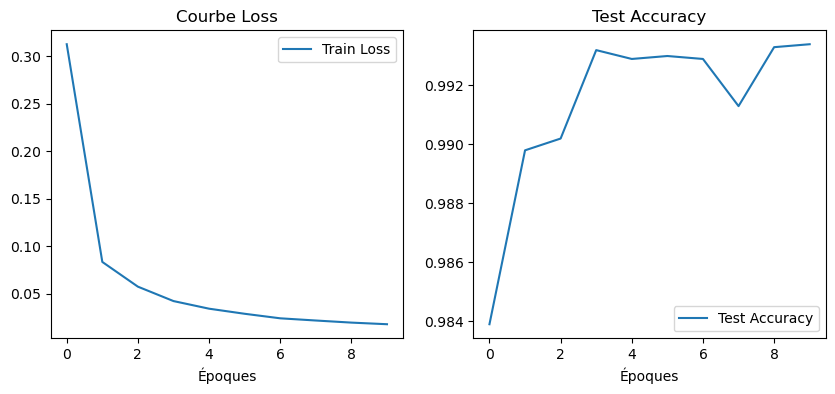


Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      1.00       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



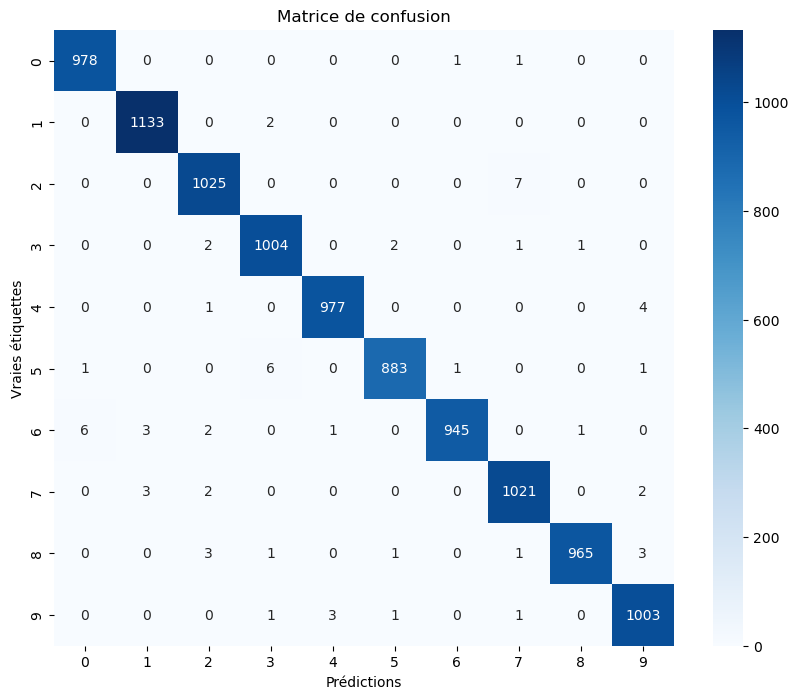

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# 1. Préparation des données
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertit en Tensor PyTorch
    transforms.Normalize((0.5,), (0.5,))  # Normalise entre -1 et 1 (optionnel)
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader  = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader   = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 2. Définition du modèle
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*3*3, 100)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.view(-1, 64*3*3)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# 3. Entraînement
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10
train_losses, test_accuracies = [], []

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))
    
    # Évaluation sur test
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
            outputs = model(test_inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += test_labels.size(0)
            correct += (predicted == test_labels).sum().item()
    acc = correct / total
    test_accuracies.append(acc)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {train_losses[-1]:.4f}, Test accuracy: {acc:.4f}")

# 4. Affichage des courbes d’entraînement
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.title('Courbe Loss')
plt.xlabel('Époques')
plt.legend()
plt.subplot(1,2,2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.title("Test Accuracy")
plt.xlabel('Époques')
plt.legend()
plt.show()

# 5. Rapport de classification et matrice de confusion
all_preds = []
all_targets = []
model.eval()
with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs = test_inputs.to(device)
        outputs = model(test_inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(test_labels.numpy())
print("\nRapport de classification :\n", classification_report(all_targets, all_preds))
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()


Mnist dataset avec VGG-16 (Keras)

Class distribution in training set:
 0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


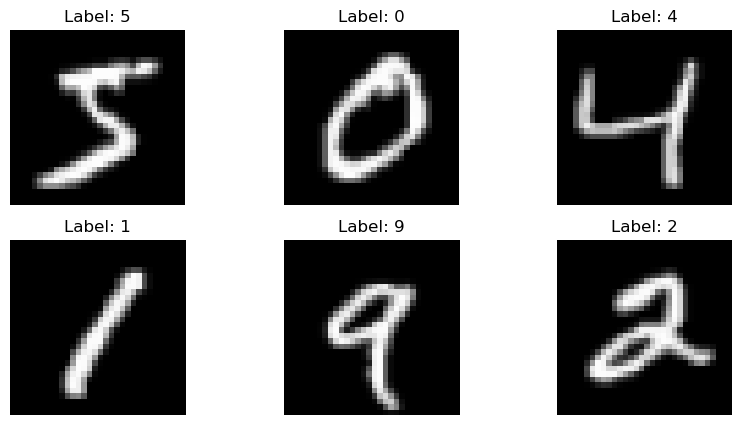

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 185s 3us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,766,998 (56.33 MB)

 Trainable params: 52,310 (204.34 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 517s 1s/step - accuracy: 0.7090 - loss: 1.0292 - val_accuracy: 0.9194 - val_loss: 0.2874
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.9285 - loss: 0.2584 - val_accuracy: 0.9438 - val_loss: 0.1950
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 404s 1s/step - accuracy: 0.9452 - loss: 0.1881 - val_accuracy: 0.9523 - val_loss: 0.1573
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.9536 - loss: 0.1514 - val_accuracy: 0.9554 - val_loss: 0.1419
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 503s 1s/step - accuracy: 0.9621 - loss: 0.1300 - val_accuracy: 0.9595 - val_loss: 0.1276
Test accuracy: 0.9629, Test loss: 0.1186


In [3]:
# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.applications import VGG16
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 

# Step 1: Load Data and Visualization
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data for VGG16 (convert to 3 channels and resize to 32x32)
x_train = np.stack([x_train, x_train, x_train], axis=-1)  # Convert grayscale to RGB
x_test = np.stack([x_test, x_test, x_test], axis=-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images to 32x32 (VGG16 requires at least 32x32)
from skimage.transform import resize
x_train_resized = np.zeros((x_train.shape[0], 32, 32, 3), dtype=np.float32)
x_test_resized = np.zeros((x_test.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_train.shape[0]):
    x_train_resized[i] = resize(x_train[i], (32, 32, 3), anti_aliasing=True)
for i in range(x_test.shape[0]):
    x_test_resized[i] = resize(x_test[i], (32, 32, 3), anti_aliasing=True)
x_train = x_train_resized
x_test = x_test_resized

# Display class distribution using pandas
class_distribution = pd.Series(y_train).value_counts().sort_index()
print("Class distribution in training set:\n", class_distribution)

# Visualize a few sample images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Step 2: Model Designing with VGG16
# Load pre-trained VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
base_model.trainable = False

# Build the model
model = Sequential([
    Input(shape=(32, 32, 3)),
    base_model,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 3: Train
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Step 4: Test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

Mnist dataset avec ResNet-50 (Keras)

Class distribution in training set:
 0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


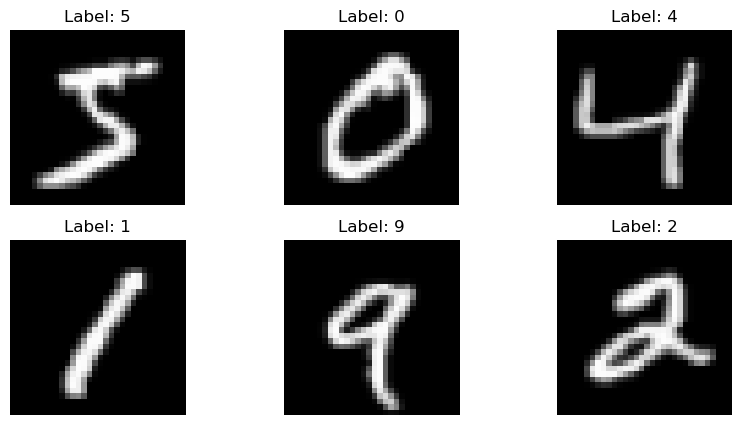

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,793,622 (90.77 MB)

 Trainable params: 205,910 (804.34 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 304s 765ms/step - accuracy: 0.6197 - loss: 1.2210 - val_accuracy: 0.8771 - val_loss: 0.4456
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 218s 583ms/step - accuracy: 0.8662 - loss: 0.4499 - val_accuracy: 0.9006 - val_loss: 0.3395
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 256s 684ms/step - accuracy: 0.8905 - loss: 0.3531 - val_accuracy: 0.9117 - val_loss: 0.2896
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 271s 722ms/step - accuracy: 0.9011 - loss: 0.3165 - val_accuracy: 0.9195 - val_loss: 0.2714
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 290s 636ms/step - accuracy: 0.9114 - loss: 0.2835 - val_accuracy: 0.9211 - val_loss: 0.2526
Test accuracy: 0.9250, Test loss: 0.2397


In [1]:
# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.applications import ResNet50
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

# Step 1: Load Data and Visualization
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data for ResNet50 (convert to 3 channels and resize to 32x32)
x_train = np.stack([x_train, x_train, x_train], axis=-1)  # Convert grayscale to RGB
x_test = np.stack([x_test, x_test, x_test], axis=-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images to 32x32 (ResNet50 requires at least 32x32)
x_train_resized = np.zeros((x_train.shape[0], 32, 32, 3), dtype=np.float32)
x_test_resized = np.zeros((x_test.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_train.shape[0]):
    x_train_resized[i] = resize(x_train[i], (32, 32, 3), anti_aliasing=True)
for i in range(x_test.shape[0]):
    x_test_resized[i] = resize(x_test[i], (32, 32, 3), anti_aliasing=True)
x_train = x_train_resized
x_test = x_test_resized

# Display class distribution using pandas
class_distribution = pd.Series(y_train).value_counts().sort_index()
print("Class distribution in training set:\n", class_distribution)

# Visualize a few sample images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Step 2: Model Designing with ResNet50
# Load pre-trained ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
base_model.trainable = False

# Build the model
model = Sequential([
    Input(shape=(32, 32, 3)),
    base_model,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 3: Train
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Step 4: Test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

Mnist dataset avec LeNet-5 (tenserflow)

Training Data: (60000, 28, 28, 1), (60000, 10)
Test Data: (10000, 28, 28, 1), (10000, 10)

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                          │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ S2 (AveragePooling2D)                │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ C3 (Conv2D)                          │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ S4 (AveragePooling2D)                │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ C5 (Dense)                           │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC6 (Dense)                          │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8703 - loss: 0.4028 - val_accuracy: 0.9728 - val_loss: 0.0826
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9771 - loss: 0.0725 - val_accuracy: 0.9825 - val_loss: 0.0573
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9861 - loss: 0.0440 - val_accuracy: 0.9835 - val_loss: 0.0517
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9911 - loss: 0.0307 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9934 - loss: 0.0229 - val_accuracy: 0.9839 - val_loss: 0.0552
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9950 - loss: 0.0178 - val_accuracy: 0.9853 - val_loss: 0.0513
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9879 - val_loss: 0.0423
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9970 -

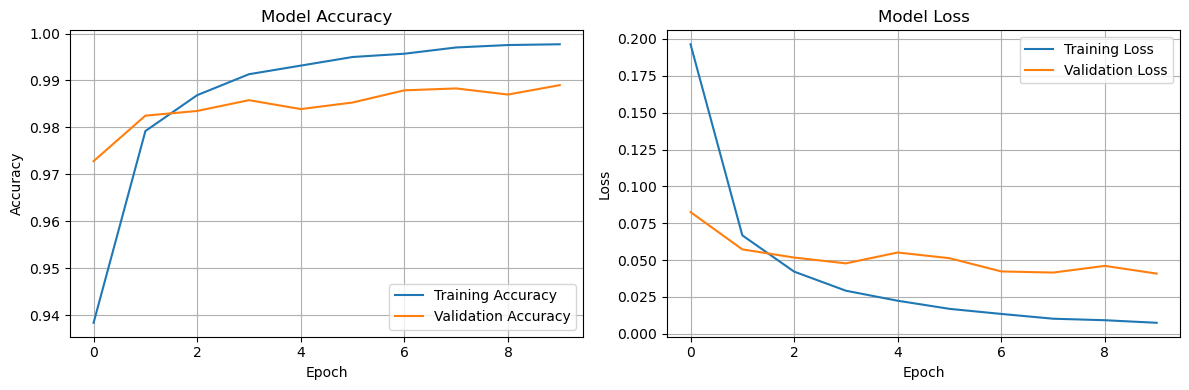

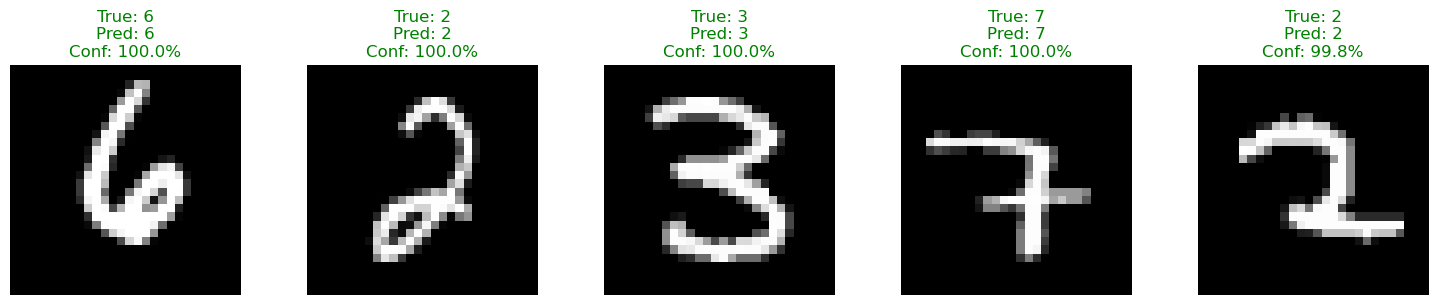

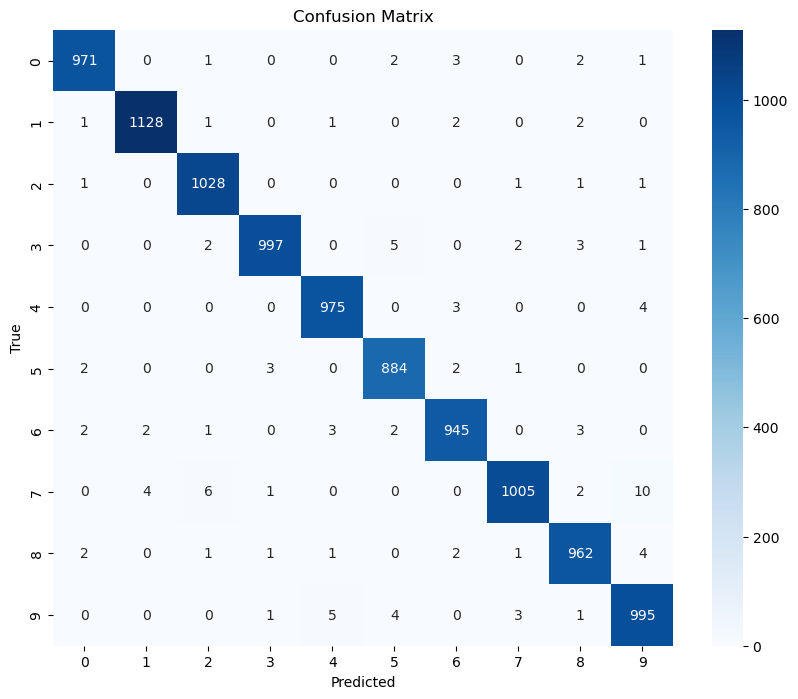


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Download and Load the Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pre-processing and Normalizing the Data
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f'Training Data: {x_train.shape}, {y_train.shape}')
print(f'Test Data: {x_test.shape}, {y_test.shape}')

# Define LeNet-5 Model (corrected architecture)
def build_lenet(input_shape):
    """
    Build LeNet-5 model with correct architecture
    """
    model = tf.keras.Sequential([
        # C1 Convolution Layer: 6 feature maps of size 28x28
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), 
                              activation='tanh', input_shape=input_shape, 
                              padding='same', name='C1'),
        
        # S2 SubSampling Layer: Average pooling
        tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), name='S2'),
        
        # C3 Convolution Layer: 16 feature maps (corrected from 6)
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), 
                              activation='tanh', name='C3'),
        
        # S4 SubSampling Layer: Average pooling
        tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), name='S4'),
        
        # Flatten before fully connected layers
        tf.keras.layers.Flatten(name='Flatten'),
        
        # C5 Fully Connected Layer: 120 neurons
        tf.keras.layers.Dense(units=120, activation='tanh', name='C5'),
        
        # FC6 Fully Connected Layer: 84 neurons
        tf.keras.layers.Dense(units=84, activation='tanh', name='FC6'),
        
        # Output Layer: 10 classes
        tf.keras.layers.Dense(units=10, activation='softmax', name='Output')
    ])
    
    # Compile the Model with updated optimizer syntax
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),  # Added momentum
        metrics=['accuracy']
    )
    
    return model

# Build and display model
lenet = build_lenet(input_shape)
print("\nModel Architecture:")
lenet.summary()

# Train the model with validation split
print("\nTraining the model...")
epochs = 10
history = lenet.fit(
    x_train, y_train, 
    epochs=epochs,
    batch_size=128, 
    verbose=1,
    validation_data=(x_test, y_test)  # Added validation during training
)

# Evaluate the Model
print("\nEvaluating the model...")
loss, acc = lenet.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {acc:.4f}')

# Plot training history
def plot_training_history(history):
    """Plot training and validation accuracy/loss"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Make predictions and visualize results
def predict_and_visualize(model, x_test, y_test, num_samples=5):
    """Predict and visualize random test samples"""
    # Select random samples
    indices = np.random.choice(len(x_test), num_samples, replace=False)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    if num_samples == 1:
        axes = [axes]
    
    for i, idx in enumerate(indices):
        # Make prediction
        pred = model.predict(x_test[idx:idx+1], verbose=0)
        predicted_class = np.argmax(pred)
        true_class = np.argmax(y_test[idx])
        confidence = np.max(pred) * 100
        
        # Plot image
        axes[i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True: {true_class}\nPred: {predicted_class}\nConf: {confidence:.1f}%')
        axes[i].axis('off')
        
        # Color title based on correctness
        if predicted_class == true_class:
            axes[i].title.set_color('green')
        else:
            axes[i].title.set_color('red')
    
    plt.tight_layout()
    plt.show()

# Visualize predictions
predict_and_visualize(lenet, x_test, y_test, 5)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for all test data
y_pred = lenet.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Version 2 du Code Mnist dataset avec VGG-16 vs ResNet-50 (Keras )

Training VGG16 Model...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - accuracy: 0.6839 - loss: 1.0887 - val_accuracy: 0.9223 - val_loss: 0.2875
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 0.9266 - loss: 0.2647 - val_accuracy: 0.9423 - val_loss: 0.1960
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 627s 2s/step - accuracy: 0.9455 - loss: 0.1875 - val_accuracy: 0.9514 - val_loss: 0.1589
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 691s 2s/step - accuracy: 0.9538 - loss: 0.1544 - val_accuracy: 0.9548 - val_loss: 0.1485
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.9598 - loss: 0.1367 - val_accuracy: 0.9604 - val_loss: 0.1300
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 388ms/step


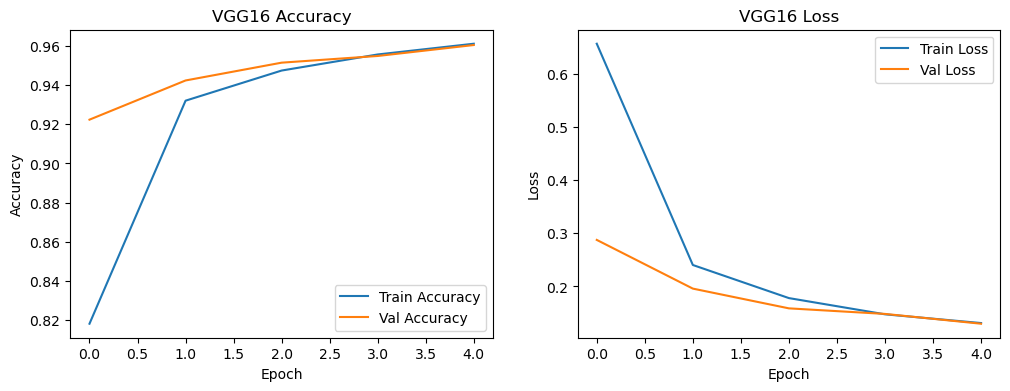

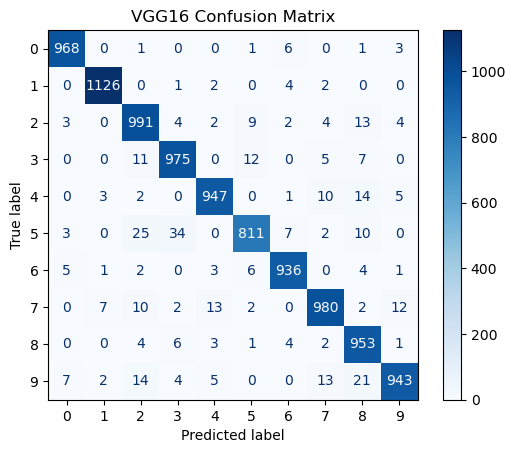

Training ResNet50 Model...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 249s 622ms/step - accuracy: 0.6039 - loss: 1.2828 - val_accuracy: 0.8515 - val_loss: 0.4953
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 185s 492ms/step - accuracy: 0.8583 - loss: 0.4695 - val_accuracy: 0.9005 - val_loss: 0.3436
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 188s 502ms/step - accuracy: 0.8893 - loss: 0.3609 - val_accuracy: 0.9183 - val_loss: 0.2840
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 202s 503ms/step - accuracy: 0.9041 - loss: 0.3122 - val_accuracy: 0.9232 - val_loss: 0.2617
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 184s 491ms/step - accuracy: 0.9101 - loss: 0.2885 - val_accuracy: 0.9273 - val_loss: 0.2454
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 164ms/step


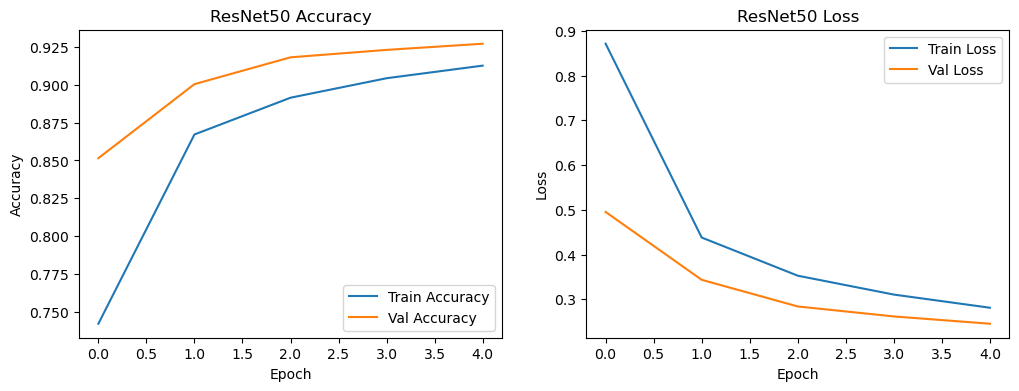

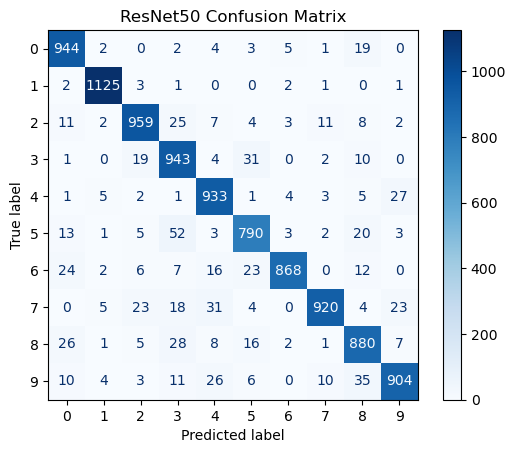


Comparison Table:
          Test Accuracy  Test Loss
VGG16            0.9630   0.120306
ResNet50         0.9266   0.238133


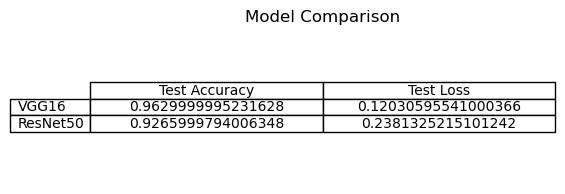

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.applications import VGG16, ResNet50
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skimage.transform import resize
from keras.callbacks import History

# Step 1: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to RGB and resize to 32x32 for VGG16 and ResNet50
x_train = np.stack([x_train, x_train, x_train], axis=-1)
x_test = np.stack([x_test, x_test, x_test], axis=-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize to 32x32
x_train_resized = np.zeros((x_train.shape[0], 32, 32, 3), dtype=np.float32)
x_test_resized = np.zeros((x_test.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_train.shape[0]):
    x_train_resized[i] = resize(x_train[i], (32, 32, 3), anti_aliasing=True)
for i in range(x_test.shape[0]):
    x_test_resized[i] = resize(x_test[i], (32, 32, 3), anti_aliasing=True)
x_train = x_train_resized
x_test = x_test_resized

# One-hot encode labels for confusion matrix
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Function to plot learning curves
def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Results dictionary for comparison
results = {}

# Step 2: VGG16 Model
print("Training VGG16 Model...")
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model_vgg.trainable = False

model_vgg = Sequential([
    Input(shape=(32, 32, 3)),
    base_model_vgg,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_vgg = History()
model_vgg.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1, callbacks=[history_vgg])

# Evaluate VGG16
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(x_test, y_test, verbose=0)
y_pred_vgg = np.argmax(model_vgg.predict(x_test), axis=1)

# Plot for VGG16
plot_learning_curves(history_vgg, 'VGG16')
plot_confusion_matrix(y_test, y_pred_vgg, 'VGG16')

results['VGG16'] = {'Test Accuracy': test_acc_vgg, 'Test Loss': test_loss_vgg}

# Step 3: ResNet50 Model
print("Training ResNet50 Model...")
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model_resnet.trainable = False

model_resnet = Sequential([
    Input(shape=(32, 32, 3)),
    base_model_resnet,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet = History()
model_resnet.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1, callbacks=[history_resnet])

# Evaluate ResNet50
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(x_test, y_test, verbose=0)
y_pred_resnet = np.argmax(model_resnet.predict(x_test), axis=1)

# Plot for ResNet50
plot_learning_curves(history_resnet, 'ResNet50')
plot_confusion_matrix(y_test, y_pred_resnet, 'ResNet50')

results['ResNet50'] = {'Test Accuracy': test_acc_resnet, 'Test Loss': test_loss_resnet}

# Step 4: Comparison Table
comparison_df = pd.DataFrame(results).T
print("\nComparison Table:")
print(comparison_df)

# Display the table as a plot (optional, for visual appeal)
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=comparison_df.values, colLabels=comparison_df.columns, rowLabels=comparison_df.index, cellLoc='center', loc='center')
plt.title('Model Comparison')
plt.show()

Étapes :

Préparer les données (identique au MLP)

Définir un CNN avec PyTorch

Entraîner le réseau

Évaluer les performances

Tester sur une image

In [3]:
#Préparer les données

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)


Définition du modèle CNN

In [7]:
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)  # sortie: 16x24x24
        self.pool = nn.MaxPool2d(2, 2)                # sortie: 16x12x12
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5) # sortie: 32x8x8
        self.fc1 = nn.Linear(32 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))          # conv1 + relu + pool
        x = self.pool(F.relu(self.conv2(x)))          # conv2 + relu + pool
        x = x.view(-1, 32 * 4 * 4)                     # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN_MNIST()


Entraînement du modèle

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")


Epoch 1/5, Loss: 155.9816
Epoch 2/5, Loss: 45.7238
Epoch 3/5, Loss: 32.0149
Epoch 4/5, Loss: 23.9691
Epoch 5/5, Loss: 20.2040


Évaluation du modèle

In [11]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Précision sur le test : {100 * correct / total:.2f}%")


Précision sur le test : 98.89%


Tester sur une image du test set

In [ ]:
import matplotlib.pyplot as plt

image, label = test_dataset[1]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Vraie étiquette : {label}")
plt.axis('off')
plt.show()

# Prédiction
model.eval()
with torch.no_grad():
    input_image = image.unsqueeze(0)  # ajouter batch dimension
    output = model(input_image)
    predicted = torch.argmax(output, dim=1).item()

print(f"Prédiction du modèle : {predicted}")
